### Imports and Data

In [ ]:

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
uploaded = files.upload()
! unzip hw2_data.zip

Saving hw2_data.zip to hw2_data.zip
Archive:  hw2_data.zip
   creating: hw2_data/Data-set-1/
   creating: hw2_data/Data-set-1/Train-subsets/
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_10_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_100_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_20_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_30_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_40_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_50_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_60_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_70_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_80_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_90_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_10_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_100_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_20_.txt  
  inflating:

## Least Squares Regression


### L1 and L2 error

In [ ]:
def L2_error(y, y_hat):
    """
    L2 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L2 error
    """
    L2_error =(np.sum(abs(np.power(np.subtract(y_hat,y),2))) / (y.shape[0]) ) 
    return L2_error



def L1_error(y, y_hat):
    """
    L1 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L1 error
    """
    L1_error = np.sum(abs(np.subtract(y_hat,y))) / (y.shape[0])
    
    return L1_error

### Least Square Regression

In [ ]:
def LinearRegression(train_data, train_labels):
    """
    Runs OLS on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
    
    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term     
    """
    X_0=np.ones(len(train_data))[:, np.newaxis]
    all_data = np.hstack((X_0,train_data))
    w_all=np.dot(np.dot(np.linalg.inv(np.dot(all_data.T,all_data)) , all_data.T),train_labels)
    w=w_all[1:]
    b=w_all[0]

    return (w,b)

### Ridge Regression

In [ ]:
def LinearRegressionL2(train_data, train_labels, lambda_):
    """
    Runs linear regression with L2 regularization (ridge) on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
        lambda_  (float): scalar weighting the L2 penalty

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term  
    """
    X_0=np.ones(len(train_data))[:, np.newaxis]
    all_data = np.hstack((X_0,train_data))
    w_all=np.dot(np.dot(np.linalg.inv(np.dot(all_data.T,all_data)+lambda_ * np.identity(len(all_data[1]))) , all_data.T),train_labels)
    w=w_all[1:]
    b=w_all[0]
    
    return (w,b)

[176.25063828535193, 0, 0, 0, 0, 0]
[176.25063828535193, 175.9487598606842, 0, 0, 0, 0]
[176.25063828535193, 175.9487598606842, 175.73358896798277, 0, 0, 0]
[176.25063828535193, 175.9487598606842, 175.73358896798277, 174.9813850636844, 0, 0]
[176.25063828535193, 175.9487598606842, 175.73358896798277, 174.9813850636844, 174.18024320858203, 0]
[176.25063828535193, 175.9487598606842, 175.73358896798277, 174.9813850636844, 174.18024320858203, 167.5272845108879]


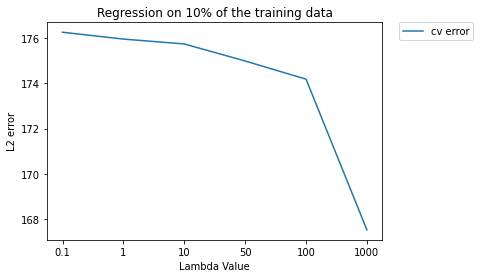

[110.88368314003927, 0, 0, 0, 0, 0]
[110.88368314003927, 110.76522354836061, 0, 0, 0, 0]
[110.88368314003927, 110.76522354836061, 110.74505935042494, 0, 0, 0]
[110.88368314003927, 110.76522354836061, 110.74505935042494, 110.74325903676856, 0, 0]
[110.88368314003927, 110.76522354836061, 110.74505935042494, 110.74325903676856, 110.74317514851668, 0]
[110.88368314003927, 110.76522354836061, 110.74505935042494, 110.74325903676856, 110.74317514851668, 110.74702458075717]


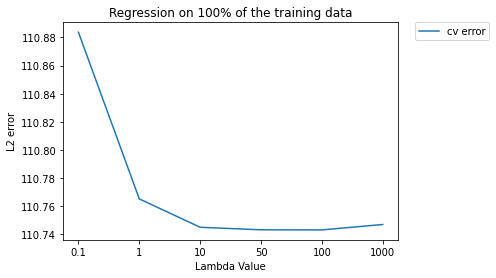

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

def predict(w, b, x):
    
    y=np.dot(x,w)+b
    return (y)
for i in [10, 100]:
    lambdas = [0.1,1,10,50,100,1000]
    X_test = pd.read_csv('hw2_data/Data-set-2/X_test.txt').values
    y_test = pd.read_csv('hw2_data/Data-set-2/y_test.txt').values
    X_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).values
    y_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).values
    train_errors = [0]*6
    test_errors = [0]*6
    cv_errors = [0]*6
    
    
    
    dataset =  pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1) 

    for k in range(len(lambdas)):
      errors = [0]*5
      for j in range(5):
        testcv=dataset[ int(j*(len(dataset.index)/5) ) :  int((j+1)*(len(dataset.index)/5))]
        traincv=pd.concat([dataset[0: int(j*(len(dataset.index)/5) )],dataset[int((j+1)*(len(dataset.index)/5)):]],axis=0)

        w=LinearRegressionL2( traincv.iloc[:,0:-1] ,traincv.iloc[:,-1:],lambdas[k])[0]
        b=LinearRegressionL2( traincv.iloc[:,0:-1],traincv.iloc[:,-1:],lambdas[k])[1]
        errors[j]=float(L2_error(predict(w,b,testcv.iloc[:,0:-1] ),testcv.iloc[:,-1:] ))
      cv_errors[k]=np.sum(errors)/5
      print(cv_errors)
      w=LinearRegressionL2( dataset.iloc[:,0:-1] ,dataset.iloc[:,-1:],lambdas[k])[0]
      b=LinearRegressionL2( dataset.iloc[:,0:-1],dataset.iloc[:,-1:],lambdas[k])[1]
      test_errors[k]=float(L2_error(predict(w,b,X_test ),y_test))
      train_errors[k]=float(L2_error(predict(w,b,X_train ),y_train))
    plt.plot(range(6),cv_errors, label = 'cv error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(6), lambdas)
    plt.show()

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

def predict(w, b, x):
    
    y=np.dot(x,w)+b
    return (y)

for i in [5, 100]:
    lambda_ = [0.1,1,10,50,100,150,200,500,1000,2500,5000]
    train_error = [0]*11
    test_error = [0]*11
    cv_error = [0]*11
    X_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/X_test',header=None).values
    y_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/y_test',header=None).values
    X_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'.txt',header=None).values
    y_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'.txt',header=None).values 
    

    dataset =  pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1) .sample(n=len(dataset.index))

    for k in range(len(lambda_)):
      errors = [0]*5
      for j in range(5):
        testcv=dataset[ int(j*(len(dataset.index)/5) ) :  int((j+1)*(len(dataset.index)/5))]
        traincv=pd.concat([dataset[0: int(j*(len(dataset.index)/5) )],dataset[int((j+1)*(len(dataset.index)/5)):]],axis=0)

        w=LinearRegressionL2( traincv.iloc[:,0:-1] ,traincv.iloc[:,-1:],lambda_[k])[0]
        b=LinearRegressionL2( traincv.iloc[:,0:-1],traincv.iloc[:,-1:],lambda_[k])[1]
        errors[j]=L2_error(predict(w,b,testcv.iloc[:,0:-1] ),testcv.iloc[:,-1:] )
      cv_error[k]=sum(errors)
    plt.plot(range(11), train_error, label='training error')
    plt.plot(range(11),cv_error, label = 'cv error')
    plt.plot(range(11), test_error, label = 'test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(11), lambda_)
    plt.show()


FileNotFoundError: ignored

##  Batch Gradient Descent


### Gradient Descent Linear Regression

In [ ]:
def grad_J(x,y,n,theta):
    returnValue = np.zeros(len(x[0]))
    for i in range(n):
        returnValue += (np.dot(x[i],theta)-y[i])*x[i]
    returnValue = returnValue/(n)
    return returnValue

def LinearRegressionGD(train_data, train_labels, iters, learning_rate):
    """
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data 
        iters (int): the number of iterations to run Gradient Descent
        learning_rate (float): the alpha value for gradient descent

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term 
    """
    X_0=np.ones(len(train_data))[:, np.newaxis]
    all_data = np.hstack((X_0,train_data))
    theta_old = np.zeros(len(all_data[0]))
    theta_new = np.ones(len(all_data[0])) # The algorithm starts at [1,1]
    n_k = learning_rate # step size
    precision = 0.01
    num_steps = 0
    s_k = float("inf")

    while np.linalg.norm(s_k) > precision and num_steps<iters:
        num_steps += 1
        theta_old = theta_new
        s_k = grad_J(all_data,train_labels,len(all_data),theta_old)
        theta_new = theta_old - n_k * s_k

    w = theta_new[1:]
    b = theta_new[0]
    
    return (w, b)

###Batch Gradient Descent Runtime


In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).values
X_train = pd.read_csv('hw2_data/Data-set-1/X_train.txt',delimiter='\t', header=None).dropna(axis=1).values
y_train = pd.read_csv('hw2_data/Data-set-1/y_train.txt', header=None).values

start = time.time()
(w,b) = LinearRegression(X_train, y_train)
y_test_pred = np.matmul(X_test, w) + b
y_train_pred = np.matmul(X_train, w) + b


L2_error(y_test, y_test_pred)
print("--- OLS Closed Form ---")
print("W:", w.T, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)
print()

start = time.time()
(w,b) = LinearRegressionGD(X_train, y_train, 100, .01)
y_test_pred = np.matmul(X_test, [w]) + b
y_train_pred = np.matmul(X_train, [w]) + b
L2_error(y_test, y_test_pred)
print("---  Gradient Descent ---")
print("W:", w, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)

--- OLS Closed Form ---
W: [[-2.23442304]] B: [1.16717388]
L2 Training Error: 0.2876339586619918
L2 Test Error: 0.3347596869735334
Time: 0.0040662288665771484

---  Gradient Descent ---
W: [0.37129421] B: 0.19929432537236805
L2 Training Error: 0.9388526014411525
L2 Test Error: 0.8506891771452824
Time: 0.14123249053955078
